<a href="https://colab.research.google.com/github/hatim1971/covid-19/blob/master/Covid19_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Health organizations are responding to the new outbreak of respiratory disease caused by a novel coronavirus that was first detected in China and which has now been detected in more than 140 locations internationally. The virus has been named “SARS-CoV-2” and the disease it causes has been named “coronavirus disease 2019” (abbreviated “COVID-19”).

On January 30, 2020, the International Health Regulations Emergency Committee of the World Health Organization declared the outbreak a “public health emergency of international concernexternal icon”. On March 11, World Health Organization declared the outbreak of the coronavirus as pandemic.

Two main strategies emerged to deal with this outbreak, the containment and the mitigation strategies. If the first one has proved its efficiency in China especially in the Hubei, and seems to has a promising results in South Korea and Japan, the second is under experiment in some western countries where authorities are deploying relevant strategies to flatten the curve of COVID-19 spread.



# **Milestones Week 2**


- **Created an ETL Notebook**


- **Added Data Cleansing code to the ETL Notebook**


- **Created a Feature Creation Notebook**


- **Transformed Features**


- **Created additional Features**



# **ETL process**
## **Data Sources**
Data are provided and updated daily by John Hopkins University in the format'.csv'. For each date we have to updated situations in the world. 
We can of course, found the data for a specific country provided by the relevant authoritative organisation. However, to get one of the most extensive and evolutive database that exist about the covid-19 outbreak, we decided to use the directory of JHU, and perform the necessary data manipulation.

## **Necessary data**
Data that show the spread of the outbreak since the begining
If needed Countries GDP to find correlation between reported cases and GDP. (At this step, we must stress the fact that there are two strategies limited testing (like US, France, Germany), and extensive use of tests (like China, South Korea)
Irrelevant data

## Nature of Data and frequency of update

## **Process ETL description**
## **Extract**


## **Transform**



## **Load**


Let's create a function that will transform dates on a format used in the file paths

In [2]:
import pandas as pd
import datetime as dt
df_global, df_complete = pd.DataFrame(), pd.DataFrame()

#data is available in github and provided by JHU and updated daily in separate files. (one file per day )
#the structure of each url can be divided on two parts const_url and date_url
const_url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"

# Last update date
date_update= '2020-03-17'

# this function change time format from yyyy-mm-dd to dd-mm-yyyy
import re
def date_format(dt):
        return re.sub(r'(\d{4})-(\d{1,2})-(\d{1,2})', '\\2-\\3-\\1', dt)


# this code generates the urls of data and load daily data
timeframe=pd.date_range('2020-01-22', date_update)
l=len(timeframe)
for i in range(l):
  d=str(timeframe[i]).replace("00:00:00", "").strip()
  dr= date_format(d)
  part_url= str(dr)+'.csv'
  file_url= const_url + part_url
  print(file_url)
  dfi=pd.read_csv(file_url, usecols=[1,2,3])
  dfic=pd.read_csv(file_url)
  df_global=pd.concat([df_global,dfi], sort=False)
  df_complete=pd.concat([df_complete,dfic], sort=False)

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-28-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports

At this step we have raw data that need to be manipulated to fit with our requirements.

In [3]:
df_complete.shape

(6438, 8)

In [4]:
df_complete.describe()

,Confirmed,Deaths,Recovered,Latitude,Longitude
count,6419.000000,5997.000000,6050.000000,3620.000000,3620.000000
mean,596.093473,20.800067,237.711240,30.235226,7.060384
std,4907.254626,208.538443,2591.143991,21.391519,86.127614
min,0.000000,0.000000,0.000000,-41.454500,-157.858400
25%,2.000000,0.000000,0.000000,23.700000,-76.802100
50%,12.000000,0.000000,1.000000,35.775522,12.453400
75%,104.000000,1.000000,15.000000,43.000000,95.995600
max,67799.000000,3111.000000,56003.000000,71.706900,174.886000


In [5]:
df_global.shape

(6438, 3)

# **Data cleansing**
## **Redundant data**
redundant data are observed due to the fact that in the beginning of the outbtreak, the updates were performed several times per day. Thus we have to remove this redundant data.

## **Incorrect designation**
Some countries are entred under different designation for example: 
- 'South Korea', 'Korea, South'
- 'Iran (Islamic Republic of)', Iran

In [6]:
from termcolor import colored
print(colored("The total number of coutries where coronavirus is reported is: {}".format(len(df_global['Country/Region'].unique())),'red', attrs=['reverse', 'blink']))
print('\n')
df_global['Country/Region'].unique()

The total number of coutries where coronavirus is reported is: 189




array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [0]:
#Some countries are reported with two or more different names. The objectif of this script is to fix this issue
for i in range(df_global.shape[0]):
  if df_global.iloc[i,1] == 'Iran (Islamic Republic of)':
    df_global.iloc[i,1]='Iran'
  if df_complete.iloc[i,1] == 'Iran (Islamic Republic of)':
    df_complete.iloc[i,1]='Iran'

for i in range(df_global.shape[0]):
  if df_global.iloc[i,1] == 'Korea, South':
    df_global.iloc[i,1]='South Korea'
  if df_complete.iloc[i,1] == 'Korea, South':
    df_complete.iloc[i,1]='South Korea'

### **Redundant data cleaning code**

In [8]:
#create a dataframe that group data by country
gc_global=df_global.groupby('Country/Region')

# create dataframe of Italy 
df_it=gc_global.get_group('Italy')
df_it.rename(columns={"Last Update": "date"}, inplace=True)
df_it.reset_index(drop=True, inplace=True) # setting drop=True avoid adding new column index

# create dataframe of Iran
df_ir=gc_global.get_group('Iran')
df_ir.rename(columns={"Last Update": "date"}, inplace=True)
df_ir.reset_index(drop=True, inplace=True) # setting drop=True avoid adding new column index

# create dataframe of Spain
df_sp=gc_global.get_group('Spain')
df_sp.rename(columns={"Last Update": "date"}, inplace=True)
df_sp.reset_index(drop=True, inplace=True) # setting drop=True avoid adding new column index

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [9]:
df_it.head()

,Country/Region,date,Confirmed
0,Italy,1/31/2020 23:59,2.0
1,Italy,1/31/2020 8:15,2.0
2,Italy,2020-01-31T08:15:53,2.0
3,Italy,2020-01-31T08:15:53,2.0
4,Italy,2020-01-31T08:15:53,2.0


In [10]:
df_ir.head()

,Country/Region,date,Confirmed
0,Iran,2020-02-19T23:43:02,2.0
1,Iran,2020-02-20T17:33:02,5.0
2,Iran,2020-02-21T18:53:02,18.0
3,Iran,2020-02-22T10:03:05,28.0
4,Iran,2020-02-23T15:13:15,43.0


In [11]:
df_sp.head()

,Country/Region,date,Confirmed
0,Spain,2/1/2020 2:13,1.0
1,Spain,2020-02-01T23:43:02,1.0
2,Spain,2020-02-01T23:43:02,1.0
3,Spain,2020-02-01T23:43:02,1.0
4,Spain,2020-02-01T23:43:02,1.0


Now it's time to drop redundant data and make some harmonization between the three different dataframes (Iran, Italy and Spain). This step will allow to identify day 1 for each country.

In [13]:
df_it.drop(df_it.index[0:21], inplace=True)
df_sp.drop(df_sp.index[0:26], inplace=True)
df_ir.drop(df_ir.index[0:2], inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [80]:
df_sp.head(30)

,Country/Region,date,Confirmed
26,Spain,2020-02-27T13:23:02,15.0
27,Spain,2020-02-28T15:33:03,32.0
28,Spain,2020-02-29T19:13:08,45.0
29,Spain,2020-03-01T23:33:03,84.0
30,Spain,2020-03-02T14:43:05,120.0
31,Spain,2020-03-03T23:53:03,165.0
32,Spain,2020-03-04T20:43:02,222.0
33,Spain,2020-03-05T17:43:03,259.0
34,Spain,2020-03-06T20:13:13,400.0
35,Spain,2020-03-07T17:43:05,500.0


# **Evolution of COVID-19 in Italy, Spain and Iran**
### The goal of this part is to see the consistency of data, identify incoherent information and set Day 1 for each country which is a kind of scaling.


## Scaling time series data and identifying day 1
A specific date in itself isn't relevant, because the spread of the COVID-19 pandemic depends on several parameters and strategies deployed by countries. Thus instead of using calendar date, we will use a common reference day 1 equals nearly 20 confirmed cases. This section is a part of feature creation since we will transform time series in such way that allow  relevant data analysis and modeling.

In [0]:
# Scaling datetime for Iran, day1 = 2020-02-21
from datetime import datetime,timedelta
ev_ir=df_ir.copy()
Format = '%Y-%m-%dT%H:%M:%S'
datelist = ev_ir['date']
ev_ir['date'] = datelist.map(lambda x : (datetime.strptime(x, Format)- datetime.strptime("2020-02-20T00:00:00", Format)).days  )

# Scaling datetime for Italy, day1 = 2020-02-21
from datetime import datetime,timedelta
ev_it=df_it.copy()
Format = '%Y-%m-%dT%H:%M:%S'
datelist = ev_it['date']
ev_it['date'] = datelist.map(lambda x : (datetime.strptime(x, Format)- datetime.strptime("2020-02-20T00:00:00", Format)).days)


# Scaling datetime for Spain, day1 = 2020-02-27
from datetime import datetime,timedelta
ev_esp=df_sp.copy()
Format = '%Y-%m-%dT%H:%M:%S'
datelist = ev_esp['date']
ev_esp['date'] = datelist.map(lambda x : (datetime.strptime(x, Format)- datetime.strptime("2020-02-26T00:00:00", Format)).days)

In [0]:
ev_esp.reset_index(inplace=True, drop=True)

In [0]:
ev_esp.drop(ev_esp.index[14], inplace=True)

In [0]:
ev_it.reset_index(inplace=True, drop=True)
ev_it.iloc[[20],[1]]=21
ev_it.iloc[[21],[1]]=22
ev_it.iloc[[22],[1]]=23
ev_it.iloc[[23],[1]]=24

In [0]:
ev_ir.reset_index(inplace=True, drop=True)
#Additional data cleaning:some data were incorrect and need to be corrected
ev_ir.iloc[[18],[1]]=19
ev_ir.iloc[[19],[1]]=20
ev_ir.iloc[[20],[1]]=21
ev_ir.iloc[[21],[1]]=22
ev_ir.iloc[[22],[1]]=23
ev_ir.iloc[[23],[1]]=24
ev_ir.iloc[[24],[1]]=25

In [0]:
from google.colab import files
ev_esp.to_csv('spain-cov.csv') 
files.download('spain-cov.csv')
ev_it.to_csv('italy-cov.csv') 
files.download('italy-cov.csv')
ev_ir.to_csv('iran-cov.csv') 
files.download('iran-cov.csv')

In [81]:
ev_esp.head(30)

,Country/Region,date,Confirmed
0,Spain,1,15.0
1,Spain,2,32.0
2,Spain,3,45.0
3,Spain,4,84.0
4,Spain,5,120.0
5,Spain,6,165.0
6,Spain,7,222.0
7,Spain,8,259.0
8,Spain,9,400.0
9,Spain,10,500.0


# **Data Visualization**

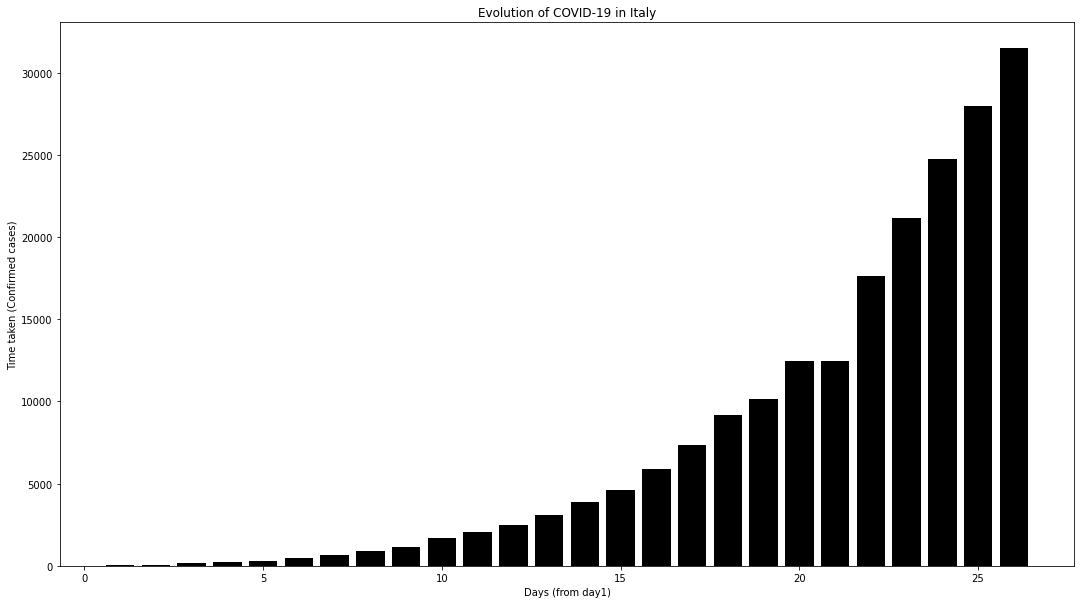

In [74]:
# Import `pyplot` from `matplotlib`
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize the plot
fig = plt.figure(figsize=(40,10))
ax1 = fig.add_subplot(121)



# or replace the three lines of code above by the following line: 
#fig, ax1 = plt.subplots(1, figsize=(40,10), color=['red'])

# Plot the data
ax1.bar(ev_it['date'],ev_it['Confirmed'], color= ('#000000'))

# Plot Legend
plt.title("Evolution of COVID-19 in Italy")
plt.xlabel("Days (from day1)")
plt.ylabel("Time taken (Confirmed cases)")


# Show the plot
plt.show()

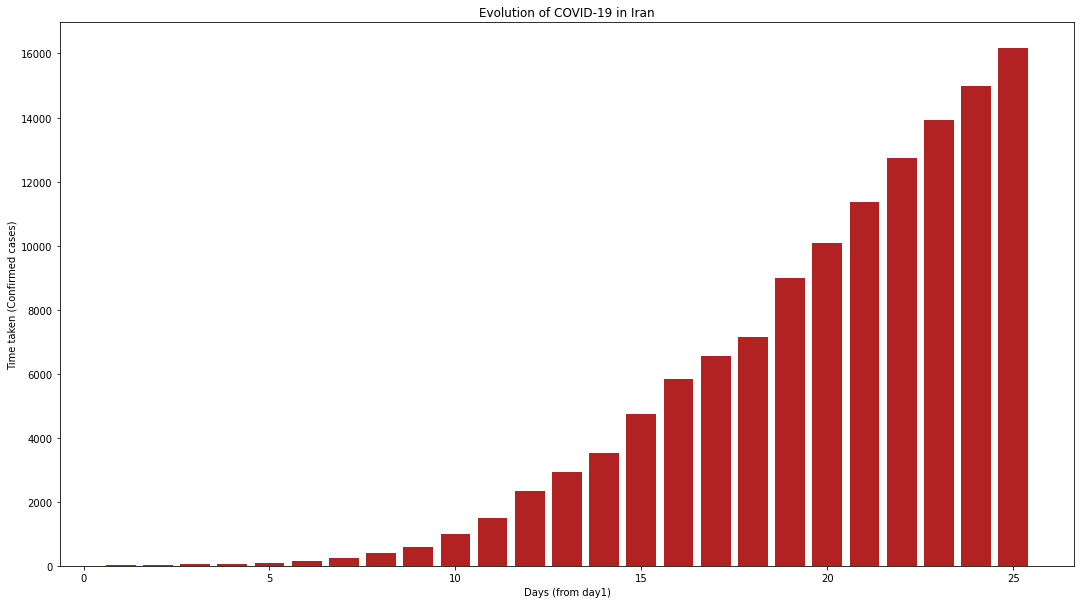

In [53]:
# Import `pyplot` from `matplotlib`
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize the plot
fig = plt.figure(figsize=(40,10))
ax1 = fig.add_subplot(121)


# or replace the three lines of code above by the following line: 
#fig, ax1 = plt.subplots(1, figsize=(40,10))

# Plot the data
ax1.bar(ev_ir['date'],ev_ir['Confirmed'], color= ('#B22222'))

# Plot Legend
plt.title("Evolution of COVID-19 in Iran")
plt.xlabel("Days (from day1)")
plt.ylabel("Time taken (Confirmed cases)")


# Show the plot
plt.show()

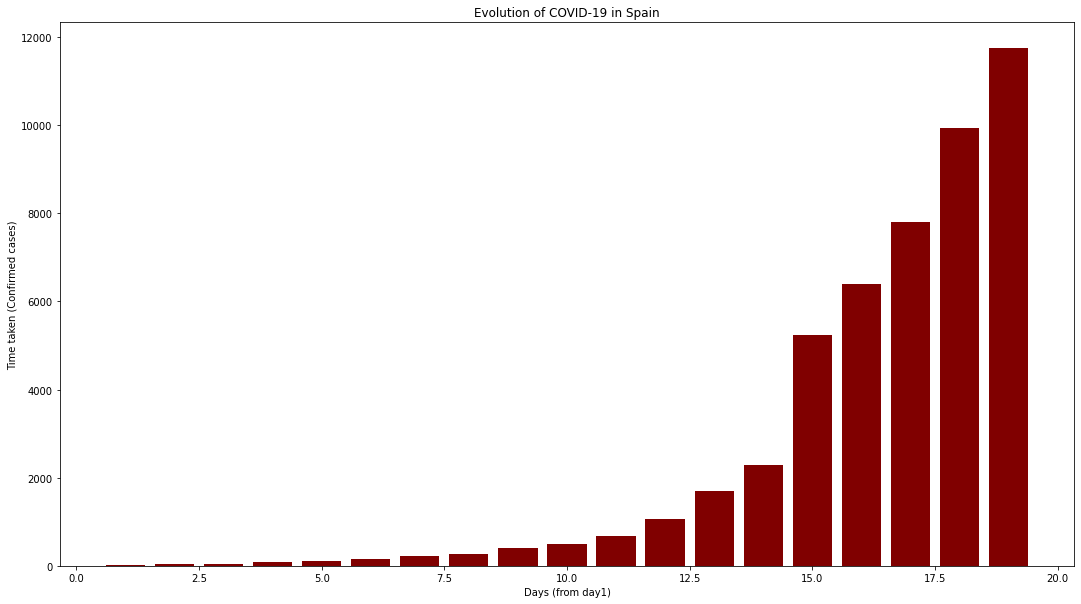

In [55]:
# Import `pyplot` from `matplotlib`
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize the plot
fig = plt.figure(figsize=(40,10))
ax1 = fig.add_subplot(121)


# or replace the three lines of code above by the following line: 
#fig, ax1 = plt.subplots(1, figsize=(40,10))

# Plot the data
ax1.bar(ev_esp['date'],ev_esp['Confirmed'], color=('#800000'))

# Plot Legend
plt.title("Evolution of COVID-19 in Spain")
plt.xlabel("Days (from day1)")
plt.ylabel("Time taken (Confirmed cases)")


# Show the plot
plt.show()

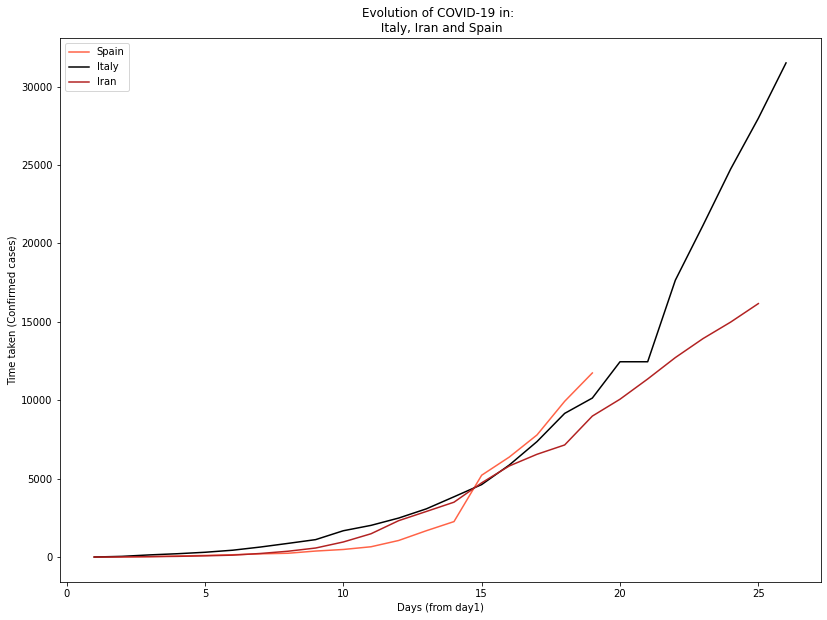

In [86]:
# Import `pyplot` from `matplotlib`
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize the plot
fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(121)


t1 = ev_esp['date']
a1 = ev_esp['Confirmed']
t2 = ev_it['date']
a2 = ev_it['Confirmed']
t3 = ev_ir['date']
a3 = ev_ir['Confirmed']

plt.plot(t1, a1, '#FF6347', label='Spain') # plotting t, a separately 
plt.plot(t2, a2, '#000000', label='Italy') # plotting t, b separately 
plt.plot(t3, a3, '#B22222', label='Iran') # plotting t, c separately 

# Plot Legend
plt.title("Evolution of COVID-19 in: \n Italy, Iran and Spain")
plt.xlabel("Days (from day1)")
plt.ylabel("Time taken (Confirmed cases)")
plt.legend()

plt.show()

The evolution of outbreak in Spain is higher than Italy and Iran from day 15.
- Italy quarantine began on March 9th ==> "Day 17"
- Spain quarantine began on March 14th ==> "Day 15"